## Convolutional neural network for image recognition 

Dataset: The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

### Import libraries

In [18]:
import torch

In [19]:
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

# datasets.MNIST() is a method provided by the datasets module of the torchvision library in PyTorch. It is used to create an instance of the MNIST dataset object, which can be used to iterate over the data and labels of the MNIST dataset.

# The arguments provided to datasets.MNIST() are:

# root: The location where the dataset should be stored on disk. If the dataset is not present at this location, it will be downloaded and saved to this location.
# train: A boolean value indicating whether to load the training set (True) or the test set (False) of the dataset.
# transform: A set of image transformations to apply to the dataset. In this case, the ToTensor() function is applied to convert the images to PyTorch tensors.
# download: A boolean value indicating whether to download the dataset if it is not present at the specified root location.


In [20]:
print(train_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [21]:
print(test_data)

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [22]:
print(train_data.data.size())
print(test_data.data.size())

# you don't need to split the train and test datasets, standard datasets, all algorithms's performance competition are based on the same datasets, fair and effieicint to coampare the performance of different algorith,ms; 
# that's why MNIST dataset is normally used as the benchmark dataset.

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


## Visualization of MNIST dataset

### Plot one train_data

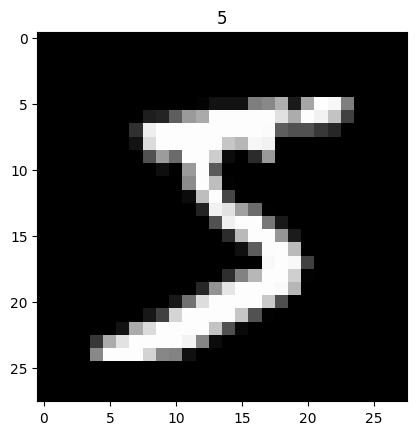

In [23]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0], cmap='gray')
plt.title('%i' % train_data.targets[0])
plt.show()

### Plot multiple train_data

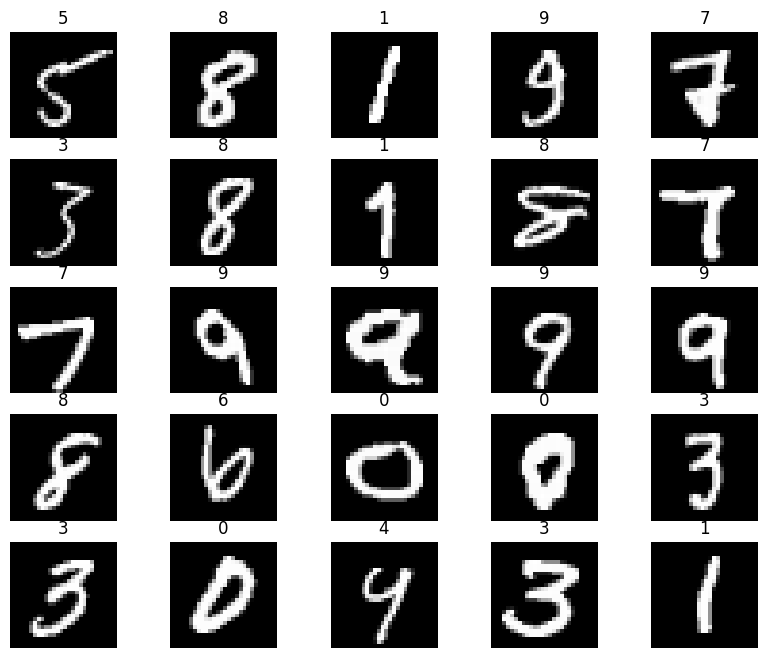

In [24]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
#     torch.randint(len(train_data), size=(1,)) is a PyTorch function call that generates a random integer tensor of size (1,) with values in the range [0, len(train_data)).
#     In this case, size=(1,) specifies a one-dimensional tensor with a size of 1 element. 
# In PyTorch, torch.randint() is a function that can be used to generate random integer tensors of a specified size, with values sampled from a specified range. 
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Preparing data for training with DataLoaders

The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.
DataLoader is an iterable that abstracts this complexity for us in an easy API.

In [25]:
from torch.utils.data import DataLoader
#  The DataLoader class provides a way to iterate over the data in the dataset in batches, so that the neural network can process the data more efficiently.
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders
# In the context of a DataLoader object in PyTorch, the shuffle parameter specifies whether or not to shuffle the data before it is loaded into the model. If shuffle is set to True, the DataLoader will shuffle the data randomly before loading it into the model. If shuffle is set to False, the data will be loaded in its original order.

{'train': <torch.utils.data.dataloader.DataLoader at 0x1464c7410>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1464bf910>}

### Define the Convolutional Neural Network model

A Convolutional Neural Network is type of neural network that is used mainly in image processing applications.
Let us create convolution neural network using torch.nn.Module. torch.nn.Module will be base class for all neural network modules. We will use 2 fully convolutional layers, Relu activation function and MaxPooling.

In [26]:
import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization
    
#  in_channels (int) – Number of channels in the input image, black-white picture: 1 channel; 1 big matrix; clourful picture: 3 channels, 3 different matrices
# out_channels (int) – Number of channels produced by the convolution; number of matrices output



in_channels=1: because our input is a grayscale image.

Stride: is the number of pixels to pass at a time when sliding the convolutional kernel.

Padding: to preserve exactly the size of the input image, it is useful to add a zero padding on the border of the image.

kernel_size: we need to define a kernel which is a small matrix of size 5 * 5. To perform the convolution operation, we just need to slide the kernel along the image horizontally and vertically and do the dot product of the kernel and the small portion of the image.

The forward() pass defines the way we compute our output using the given layers and functions.

In [27]:
cnn = CNN()
print(cnn)


CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [28]:
loss_func = nn.CrossEntropyLoss()   
loss_func

CrossEntropyLoss()

In [29]:
from torch import optim
optimizer = optim.Adam(cnn.parameters(), lr = 0.01)   
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

### Train the model
Create a function called train() and pass num of epochs, model and data loaders as input parameters.
num_epochs: Number of times our model will go through the entire training dataset

In [ ]:
from torch.autograd import Variable
num_epochs = 10
def train(num_epochs, cnn, loaders):
    
    cnn.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]               
            loss = loss_func(output, b_y)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
            pass
        
        pass
    
    
    pass
train(num_epochs, cnn, loaders)

Epoch [1/10], Step [100/600], Loss: 0.1918
Epoch [1/10], Step [200/600], Loss: 0.0718
Epoch [1/10], Step [300/600], Loss: 0.2090
Epoch [1/10], Step [400/600], Loss: 0.0976
Epoch [1/10], Step [500/600], Loss: 0.0206
Epoch [1/10], Step [600/600], Loss: 0.0766
Epoch [2/10], Step [100/600], Loss: 0.0344
Epoch [2/10], Step [200/600], Loss: 0.0410
Epoch [2/10], Step [300/600], Loss: 0.0598
Epoch [2/10], Step [400/600], Loss: 0.0397
Epoch [2/10], Step [500/600], Loss: 0.0724
Epoch [2/10], Step [600/600], Loss: 0.1209
Epoch [3/10], Step [100/600], Loss: 0.1562
Epoch [3/10], Step [200/600], Loss: 0.0575
Epoch [3/10], Step [300/600], Loss: 0.0772
Epoch [3/10], Step [400/600], Loss: 0.0848
Epoch [3/10], Step [500/600], Loss: 0.0563
Epoch [3/10], Step [600/600], Loss: 0.0265
Epoch [4/10], Step [100/600], Loss: 0.0671
Epoch [4/10], Step [200/600], Loss: 0.0730
Epoch [4/10], Step [300/600], Loss: 0.0705
Epoch [4/10], Step [400/600], Loss: 0.0240
Epoch [4/10], Step [500/600], Loss: 0.0698
Epoch [4/10

### Evaluate the model on test data

We must call model.eval() to set dropout and batch normalization layers to evaluation mode before running inference.

model.train() tells your model that you are training the model. So effectively layers like dropout, batchnorm etc. which behave different on the train and test procedures know what is going on and hence can behave accordingly.

You can call either model.eval() or model.train(mode=False) to tell that you are testing the model.

In [ ]:
def test():
    # Test the model
    cnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
        pass
    print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)
    
test()

In [ ]:
sample = next(iter(loaders['test']))
imgs, lbls = sample

In [ ]:
actual_number = lbls[:10].numpy()
actual_number

In [ ]:
test_output, last_layer = cnn(imgs[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(f'Prediction number: {pred_y}')
print(f'Actual number: {actual_number}')